### Setup 
##### This notebook ensures all packages are working correctly and sets up environmental Variables

I've struggled to get the server running correctly with the latest few versions of xarray even with the help of the developers. I've included a second environment that works for me in addition to the one currently reccomended by the developers.

Please try to set up environment 1 and run the tests below. If it doesn't work, please try environment 2.
If everything works, move on to notebook 2. 

Thanks,
Thom

---

##### Environment 1
env 1 is stored in environment_default.yml 

try ``` conda env create -f evironment_default.yml ```

##### Environment 2
env 2 is stored in environment2.yml 
try ``` conda env create -f evironment2.yml ``` as a fallback

---
---


In [2]:
# Let's create some test data
import xarray as xr
import zarr
import numpy as np
import pandas as pd


# Create a simple xarray Dataset
data = xr.Dataset(
    {
        "temperature": (("time", "lat", "lon"), 20 * np.random.rand(4, 3, 2)),
    },
    coords={
        "time": pd.date_range("2023-01-01", periods=4),
        "lat": [10, 20, 30],
        "lon": [100, 110],
    },
)
chunks = (2, 2, 2)
# Save the dataset as a Zarr store
data.to_zarr(store="simple_zarr_dataset.zarr", consolidated=True, mode="w")

##### run test_zarr_server.py 

``` python test_zarr_server.py ```

##### Check if server works - if not, go try evironment 2. If that doesn't work, please let me know!


In [3]:
import zarr
from fsspec.implementations.http import HTTPFileSystem
import xarray as xr

fs = HTTPFileSystem()

# The URL 'http://0.0.0.0:9000/zarr/' here serves one dataset
http_map = fs.get_mapper("http://0.0.0.0:8000/zarr/")

# open as a zarr group

# or open as another Xarray Dataset
ds = xr.open_zarr(http_map, consolidated=True)

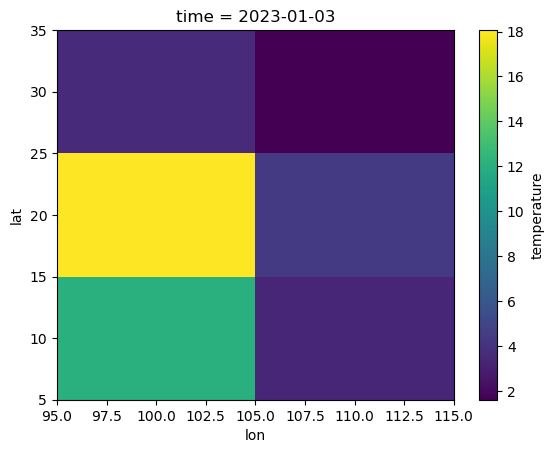

In [8]:
ds["temperature"].isel(time=2).plot()

In [ ]:
# finally, some environment setup
# we need a path to a folder containing some netcdfs (we will recursively search subfolders and select the first 50 for a test)
# this could be something like .../.../PRISM/
from dotenv import load_dotenv, set_key

netcdf_input_path = "yourpathhere"


# We also need a place to store the zarr files - only 500MB space is needed for the test
zarr_output_path = "yourpathhere"


env_file = ".env"
set_key(env_file, "INPUT_NCDF_DIRECTORY", netcdf_input_path)
set_key(env_file, "OUTPUT_ZARR_STORE", zarr_output_path)

print(f"NetCDF input path set to: {netcdf_input_path}")
print(f"Zarr output path set to: {zarr_output_path}")